In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df = pd.read_csv("../input/adult-income-dataset/adult.csv")

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
df.shape

(48842, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
df = df[df["workclass"] != "?"] 
df = df[df["occupation"] != "?"] 
df = df[df["native-country"] != "?"]

In [10]:
df.shape

(45222, 15)

In [11]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


<AxesSubplot:>

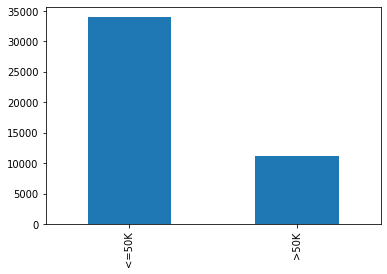

In [12]:
df['income'].value_counts().plot(kind='bar')

In [13]:
df['education'].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64

## Education

In [14]:
df['education'] = df['education'].replace(['9th','10th','11th','12th'], '9th-12th')
df['education'] = df['education'].replace(['1st-4th','5th-6th', '7th-8th'], '1st-8th')

In [15]:
df['education'].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
9th-12th         4095
Masters          2514
Assoc-voc        1959
Assoc-acdm       1507
1st-8th          1494
Prof-school       785
Doctorate         544
Preschool          72
Name: education, dtype: int64

## educational-num

In [16]:
df['educational-num'] = df['educational-num'].replace([2, 3, 4], 2)
df['educational-num'] = df['educational-num'].replace([5, 6, 7, 8], 3)
df['educational-num'] = df['educational-num'].replace([9, 10, 11, 12, 13, 14, 15, 16], [4, 5, 6, 7, 8, 9, 10, 11])

## Marital Status

In [17]:
df['marital-status'].value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [18]:
df['marital-status'] = df['marital-status'].replace(['Never-married', 'Widowed'], ['Unmarried', 'Separated'])
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
df['marital-status'] = df['marital-status'].replace('Married-spouse-absent', 'Separated')

## Occupation

In [19]:
df['occupation'].value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64

In [20]:
df['occupation'] = df['occupation'].replace(['Armed-Forces', 'Priv-house-serv', 'Protective-serv'], 'Other-service')

In [21]:
df['occupation'].value_counts()

Other-service        6030
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Name: occupation, dtype: int64

## Race

In [22]:
df['race'].value_counts()

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [23]:
df['race'] = df['race'].replace(['Asian-Pac-Islander','Amer-Indian-Eskimo'], 'Other')

## Native Country

In [24]:
df['native-country'].value_counts()[:10]

United-States    41292
Mexico             903
Philippines        283
Germany            193
Puerto-Rico        175
Canada             163
El-Salvador        147
India              147
Cuba               133
England            119
Name: native-country, dtype: int64

In [25]:
lst_1 = list(df['native-country'].unique())
lst_1.remove('United-States')

In [26]:
df['native-country'] = df['native-country'].replace(lst_1, 'Other')

## Workclass

In [27]:
df['workclass'] = df['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self-emp')
df['workclass'] = df['workclass'].replace(['Federal-gov', 'State-gov', 'Local-gov'], 'Government')

In [28]:
df.nunique()

age                   74
workclass              4
fnlwgt             26741
education             11
educational-num       11
marital-status         4
occupation            11
relationship           6
race                   3
gender                 2
capital-gain         121
capital-loss          97
hours-per-week        96
native-country         2
income                 2
dtype: int64

In [29]:
df.shape

(45222, 15)

In [30]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,9th-12th,3,Unmarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,4,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Government,336951,Assoc-acdm,7,Married,Other-service,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,5,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,9th-12th,3,Unmarried,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [31]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

# Data Visualisation

# Plotting Box plot for every continuous attribute

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

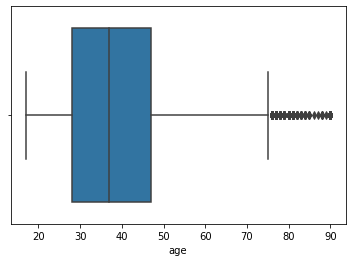

In [32]:
sns.boxplot(df['age'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fnlwgt'>

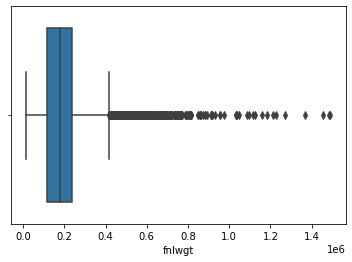

In [33]:
sns.boxplot(df['fnlwgt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='educational-num'>

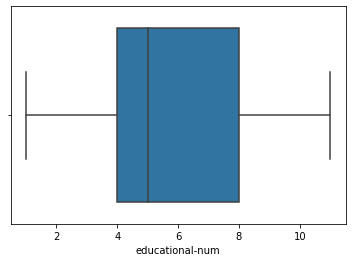

In [34]:
sns.boxplot(df['educational-num'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='capital-gain'>

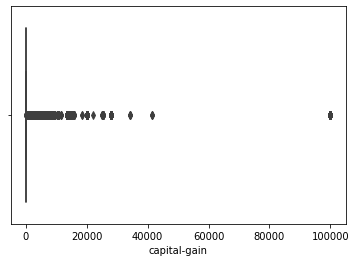

In [35]:
sns.boxplot(df['capital-gain'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='capital-loss'>

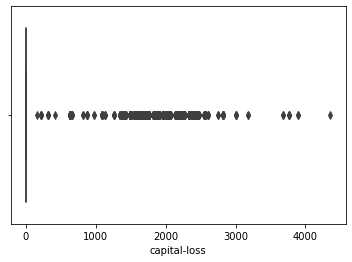

In [36]:
sns.boxplot(df['capital-loss'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hours-per-week'>

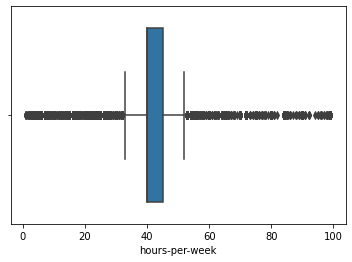

In [37]:
sns.boxplot(df['hours-per-week'])

# Statistical Analysis

## Average Age of People having more income

In [38]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,9th-12th,3,Unmarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,4,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Government,336951,Assoc-acdm,7,Married,Other-service,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,5,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,9th-12th,3,Unmarried,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## **Application of Confidence Interval**

In [39]:
# Records of adults having >50K income
more_income = df[df['income'] == ">50K"]
low_income = df[~(df['income'] == ">50K")]

In [40]:
np.mean(more_income['age'])

44.00606709493219

$$ If\ we\ consider\ \mu = 44,\ then\ it\ would\ be\ called\ as\ point\ estimate\ and\ the\ result\ is\ not\ necessarily\ to\ be\ correct$$

**For Better estimate we need to calculate the confidence interval**

In [41]:
print("Total number of citizens: ", df.shape[0])
print("Total number of adults having >50K: ", more_income.shape[0])

Total number of citizens:  45222
Total number of adults having >50K:  11208


**This is just the sample of the population, so here I'm going to show the average age of adults having income >50K with a confidence interval of 95%**

In [42]:
import scipy.stats as st
print("\n Confidence interval with 95% confidence of the age of those having more income: ", st.t.interval(alpha=0.95, df=len(more_income)-1, loc=np.mean(more_income['age']), scale=st.sem(more_income['age']))) 



 Confidence interval with 95% confidence of the age of those having more income:  (43.81460950856545, 44.19752468129894)


In [43]:
print("\n Confidence interval with 95% confidence of the age of those having less income: ", st.t.interval(alpha=0.95, df=len(low_income)-1, loc=np.mean(low_income['age']), scale=st.sem(low_income['age']))) 


 Confidence interval with 95% confidence of the age of those having less income:  (36.60526684896954, 36.89358656433087)


In [44]:
from scipy import stats

## **Dependency of Avg. hour per week on Occupation**

**Let's try to check whether Avg. hour per week for each occupation is different or all occupations just requires equivalent amount time spent per week :(**

**We can check this using one way ANOVA as it is used to check the significance of difference of the mean values among than two sample groups**

### **Number of adults from each population**

In [45]:
occup = pd.DataFrame(df['occupation'].value_counts())
occup = occup.reset_index()
occup.columns = ['Occupation', 'Count']


colorscale = [[0, '#0000ff'],[.5, '#00ffff'],[1, '#0096FF']]
fig = ff.create_table(occup, height_constant=60, colorscale = colorscale, font_colors = ['white'])

fig.add_trace(go.Bar(x= list(occup['Occupation']), 
                     y=list(occup['Count']), 
                     xaxis='x2', yaxis='y2',
                    marker=dict(color='#00FFFF'),
                    name='Count'))


fig.update_layout(
    title_text = 'Total number of records from each occupation category',
    height = 900,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Count'},
    template = 'plotly_dark'
)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 16

fig.show()

### **Assumptions of ANOVA**

**The following are the assumptions considered while using this test:**<br>
 - **Population distribution is normal.**
 - **Samples are random & Independent.**
 - **Homogenity of Sample variance.**

In the current scenario, the first two assumptions can be assumed to be true but the thrid one needs to be tested.

In [46]:
Machine_op_inspct = df[df['occupation'] == 'Machine-op-inspct']
Farming_fishing = df[df['occupation'] == 'Farming-fishing']
Other_service = df[df['occupation'] == 'Other-service']
Prof_specialty = df[df['occupation'] == 'Prof-specialty']
Craft_repair = df[df['occupation'] == 'Craft-repair']
Adm_clerical = df[df['occupation'] == 'Adm-clerical']
Exec_managerial = df[df['occupation'] == 'Exec-managerial']
Tech_support = df[df['occupation'] == 'Tech-support']
Sales = df[df['occupation'] == 'Sales']
Transport_moving = df[df['occupation'] == 'Transport-moving']
Handlers_cleaners = df[df['occupation'] == 'Handlers-cleaners']

**F-test can be used to compare the variances of two distributions whereas Levene's test can be used in case of two or more than two.**

### **Levene Test**

$$ H_0 = Variances\ are\ equal\ among\ the\ samples $$<br>
$$ H_1 = Variances\ are\ not\ equal\ among\ the\ samples $$

In [47]:
leveneTest = stats.levene(Machine_op_inspct['hours-per-week'], Farming_fishing['hours-per-week'], Other_service['hours-per-week'],
                         Prof_specialty['hours-per-week'], Craft_repair['hours-per-week'], Adm_clerical['hours-per-week'], Exec_managerial['hours-per-week'],
                         Tech_support['hours-per-week'], Sales['hours-per-week'], Transport_moving['hours-per-week'], Handlers_cleaners['hours-per-week'])
leveneTest

LeveneResult(statistic=222.00996706951275, pvalue=0.0)

Here, we can clearly see that p_val < 0.05, hence we reject the null hypothesis, concluding that the homogenity of vairance among the samples does not exist

Now, we can't go with One Way ANOVA as the assupmtions are not met, we can use its alternative non parametric test ,i.e., **Kruskall-Wallis H Test**

## **Kruskall-Wallis H Test / One Way ANOVA on Ranks**

$$ H_0 = There\ is\ no\ difference\ between\ hours\ per\ week\ among\ different\ Occupations $$
$$ H_1 = There\ is\ a\ difference\ between\ hours\ per\ week\ among\ different\ Occupations $$

In [48]:
stats.kruskal(Machine_op_inspct['hours-per-week'], Farming_fishing['hours-per-week'], Other_service['hours-per-week'],
             Prof_specialty['hours-per-week'], Craft_repair['hours-per-week'], Adm_clerical['hours-per-week'], Exec_managerial['hours-per-week'],
             Tech_support['hours-per-week'], Sales['hours-per-week'], Transport_moving['hours-per-week'], Handlers_cleaners['hours-per-week'])

KruskalResult(statistic=3802.029168098569, pvalue=0.0)

**Since, p_val < 0.05, so we are rejecting the null hypothesis and considering that all occupations do not require equal number of hours per week**

### **Checking the dependency of income of several categorical features**

$$H_0 = The \ two \ features \ are \ independent$$
$$H_1 = The \ two \ features \ are \ dependent$$

In [49]:
def chi_square(columns):
    conclusion = {}
    for i in columns:
        observed = pd.crosstab(df[i], df.income)
        p_val = stats.chi2_contingency(observed)[1]
        alpha = 0.05
        conclusion[i] = [p_val, "Fail to reject H0" if p_val > alpha else "Reject H0"]
    return conclusion

In [50]:
cat_col = df.select_dtypes('object').columns

In [51]:
cat_col

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [52]:
chi_square(cat_col)

{'workclass': [7.502170429307795e-145, 'Reject H0'],
 'education': [0.0, 'Reject H0'],
 'marital-status': [0.0, 'Reject H0'],
 'occupation': [0.0, 'Reject H0'],
 'relationship': [0.0, 'Reject H0'],
 'race': [1.6578176146497785e-84, 'Reject H0'],
 'gender': [0.0, 'Reject H0'],
 'native-country': [1.5099071570211737e-16, 'Reject H0'],
 'income': [0.0, 'Reject H0']}

# Checking if age is dependent on income or not

#### Independent sample t test, assuming the populations have same variance

$$H_0 = The \ two \ samples \ have \ same \ mean$$
$$H_1 = The \ two \ samples \ have \ different \ mean$$

In [53]:
def two_sample_ttset(columns):
    res = {}
    for i in columns:
        a = np.array(df[df['income'] == "<=50K"][i])
        b = np.array(df[df['income'] == ">50K"][i])
        p_val = stats.ttest_ind(a, b, random_state=0, equal_var = True, alternative='two-sided')[1]
        res[i] = [p_val, "Reject H0" if p_val < 0.05 else "Fails to Reject H0"]
    return res

In [54]:
num_col = df.select_dtypes('int64').columns

In [55]:
two_sample_ttset(num_col)

{'age': [0.0, 'Reject H0'],
 'fnlwgt': [0.1224230703562435, 'Fails to Reject H0'],
 'educational-num': [0.0, 'Reject H0'],
 'capital-gain': [0.0, 'Reject H0'],
 'capital-loss': [7.594015921975305e-222, 'Reject H0'],
 'hours-per-week': [0.0, 'Reject H0']}

**Conclusion: Remove fnlwgt column**

# Removing columns

In [56]:
df.drop(['fnlwgt', 'education'], axis = 'columns', inplace = True)

# Encoding

In [57]:
df['income'] = df['income'].replace(['<=50K', '>50K'], [0, 1])
df['native-country'] = df['native-country'].replace(['United-States', 'Other'], [1, 0])
df['gender'] = df['gender'].replace(['Male', 'Female'], [1, 0])

In [58]:
dummy = pd.get_dummies(df[['workclass', 'marital-status', 'occupation', 'race']], drop_first=True)

In [59]:
dummy

,workclass_Private,workclass_Self-emp,workclass_Without-pay,marital-status_Married,marital-status_Separated,marital-status_Unmarried,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Other,race_White
0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
48838,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
48839,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
48840,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [60]:
df.drop(['workclass', 'marital-status', 'occupation', 'race', 'relationship'], axis = 'columns', inplace = True)

In [61]:
df2 = pd.concat([df, dummy], axis = 'columns')

In [62]:
df2.shape

(45222, 26)

# Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('income', axis = 'columns'), df2['income'],
                                                   test_size = 0.2, stratify = df2['income'])

In [65]:
y_train.value_counts()/y_train.shape[0] * 100

0    75.216298
1    24.783702
Name: income, dtype: float64

In [66]:
y_test.value_counts()/y_test.shape[0] * 100

0    75.212825
1    24.787175
Name: income, dtype: float64

In [67]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import optuna

In [68]:
X_train.shape

(36177, 25)

# XGBoost

In [69]:
def tuner(trial):    
    params = {        
        "n_estimators": trial.suggest_int("n_estimators", 7500, 12000, step=100),
        "max_depth":trial.suggest_int("max_depth", 12, 20),
        "min_child_weight": trial.suggest_int("min_child_weight", 7, 8),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True), 
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-2, 10.),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-2, 10.),
        "gamma": trial.suggest_float("gamma", 0.7, 1.0, step=0.1),
    }    
    
    model = XGBClassifier(
        **params,
        n_jobs=-1, 
        eval_metric='auc',
        tree_method='gpu_hist', 
        gpu_id=0,
        objective='binary:logistic',
        use_label_encoder=False
    )
    
    model.fit(        
        X_train, 
        y_train, 
        early_stopping_rounds=500, 
        eval_set=[(X_test,y_test)],        
        verbose=0)
    
    y_hat = model.predict(X_test)
    
    return accuracy_score(y_test, y_hat)


# study = optuna.create_study(direction="maximize")
# study.optimize(tuner, n_trials=100)

Trial 64 finished with value: 0.8718629076838033 and parameters: {'n_estimators': 11100, 'max_depth': 16, 'min_child_weight': 7, 'learning_rate': 0.01684361683871477, 'subsample': 0.8214737522899178, 'colsample_bytree': 0.6067610765941923, 'reg_alpha': 0.8064266907023325, 'reg_lambda': 2.275344101779294, 'gamma': 1.0}. Best is trial 64 with value: 0.8718629076838033.

In [70]:
xgb=XGBClassifier(n_estimators= 11100,
                  max_depth= 16,
                  min_child_weight= 7,
                  learning_rate=  0.01684361683871477,
                  subsample=  0.8214737522899178,
                  colsample_bytree= 0.6067610765941923,
                  reg_alpha= 0.8064266907023325, 
                  reg_lambda= 2.275344101779294,
                  gamma= 1.0,
                  tree_method='gpu_hist',
                  random_state = 42)

In [71]:
xgb.fit(        
    X_train, 
    y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:04:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6067610765941923,
              gamma=1.0, gpu_id=0, importance_type='gain',
              interaction_constraints='', learning_rate=0.01684361683871477,
              max_delta_step=0, max_depth=16, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=11100, n_jobs=2,
              num_parallel_tree=1, random_state=42,
              reg_alpha=0.8064266907023325, reg_lambda=2.275344101779294,
              scale_pos_weight=1, subsample=0.8214737522899178,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [72]:
predict=xgb.predict(X_test)

In [73]:
f1_score(y_test, predict)

0.7082318558207502

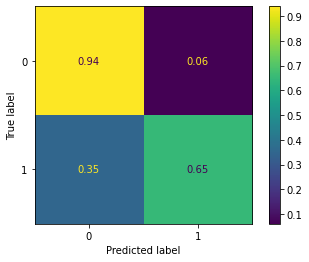

In [74]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, X_test, y_test, normalize='true')

# LightGBM

In [75]:
import lightgbm as lgb

In [76]:
def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)

    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy

In [77]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)

Trial 45 finished with value: 0.8734107241569928 and parameters: {'lambda_l1': 2.155308873417258e-06, 'lambda_l2': 8.201440131594816e-05, 'num_leaves': 61, 'feature_fraction': 0.7453195120079205, 'bagging_fraction': 0.8473225400231985, 'bagging_freq': 1, 'min_child_samples': 23}. Best is trial 45 with value: 0.8734107241569928.

In [78]:
lgbm = lgb.LGBMClassifier(lambda_l1 = 2.155308873417258e-06, 
                          lambda_l2 = 8.201440131594816e-05,
                         num_leaves = 61, 
                          feature_fraction = 0.7453195120079205, 
                          bagging_fraction = 0.8473225400231985, 
                          bagging_freq = 1, 
                          min_child_samples = 23)

In [79]:
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.8473225400231985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8473225400231985
[LightGBM] [Warning] lambda_l1 is set=2.155308873417258e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.155308873417258e-06
[LightGBM] [Warning] feature_fraction is set=0.7453195120079205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7453195120079205
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=8.201440131594816e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.201440131594816e-05


LGBMClassifier(bagging_fraction=0.8473225400231985, bagging_freq=1,
               feature_fraction=0.7453195120079205,
               lambda_l1=2.155308873417258e-06, lambda_l2=8.201440131594816e-05,
               min_child_samples=23, num_leaves=61)

In [80]:
f1_score(y_test, lgbm.predict(X_test))

0.7038752132585911

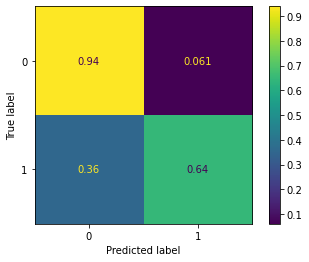

In [81]:
plot_confusion_matrix(lgbm, X_test, y_test, normalize='true')

# Catboost

In [82]:
import catboost as cb

In [83]:
def objective(trial):

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = cb.CatBoostClassifier(**param)

    gbm.fit(X_train, y_train, eval_set=[(X_test,y_test)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy

In [84]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)

Trial 69 finished with value: 0.8708678828081813 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08193925275364139, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 69 with value: 0.8708678828081813.

In [85]:
catb = cb.CatBoostClassifier(objective = 'Logloss', 
                             colsample_bylevel =  0.08193925275364139,
                            depth = 8, boosting_type = 'Plain', 
                             bootstrap_type = 'MVS')

In [86]:
catb.fit(X_train, y_train, verbose = False)

In [87]:
f1_score(y_test, catb.predict(X_test))

0.6951370032090842

In [88]:
accuracy_score(y_test, catb.predict(X_test))

0.8634604754007739

In [89]:
y_pred=pd.DataFrame(catb.predict(X_test))
y_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


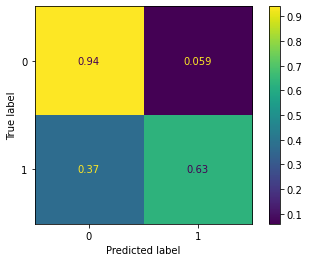

In [90]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(catb, X_test, y_test, normalize='true')

# Stacking Classifier

In [91]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [92]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('xgb', XGBClassifier(n_estimators= 11100,
                                          max_depth= 16,
                                          min_child_weight= 7,
                                          learning_rate=  0.01684361683871477,
                                          subsample=  0.8214737522899178,
                                          colsample_bytree= 0.6067610765941923,
                                          reg_alpha= 0.8064266907023325, 
                                          reg_lambda= 2.275344101779294,
                                          gamma= 1.0,
                                          tree_method='gpu_hist',
                                          random_state = 42)))
    level0.append(('lgb', lgb.LGBMClassifier(lambda_l1 = 2.155308873417258e-06, 
                                          lambda_l2 = 8.201440131594816e-05,
                                         num_leaves = 61, 
                                          feature_fraction = 0.7453195120079205, 
                                          bagging_fraction = 0.8473225400231985, 
                                          bagging_freq = 1, 
                                          min_child_samples = 23)))
    level0.append(('cb', cb.CatBoostClassifier(objective = 'Logloss', 
                                             colsample_bylevel =  0.08193925275364139,
                                            depth = 8, boosting_type = 'Plain', 
                                             bootstrap_type = 'MVS', verbose = False)))

    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

stackedModel = get_stacking()
stackedModel.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:04:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] bagging_fraction is set=0.8473225400231985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8473225400231985
[LightGBM] [Warning] lambda_l1 is set=2.155308873417258e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.155308873417258e-06
[LightGBM] [Warning] feature_fraction is set=0.7453195120079205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7453195120079205
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=8.201440131594816e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.201440131594816e-05


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:05:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.6067610765941923,
                                              gamma=1.0, gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.01684361683871477,
                                              max_delta_step=None, max_depth=16,
                                              min_child_weight=7, missing=nan,
                                              monotone_co...
                                              validate_parameters=None,
                                              v

In [93]:
f1_score(y_test, stackedModel.predict(X_test))

0.7060546875

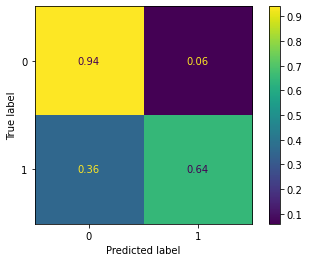

In [94]:
plot_confusion_matrix(stackedModel, X_test, y_test, normalize='true')